In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurants-revenue-prediction/Restaurant_revenue (1).csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as nm

In [3]:
path = '/kaggle/input/restaurants-revenue-prediction/Restaurant_revenue (1).csv'

In [4]:
data = pd.read_csv(path)

In [5]:
data.head(3)

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [8]:
x = data.drop(['Promotions','Cuisine_Type','Monthly_Revenue'] , axis = 1)
y = data['Monthly_Revenue']

In [9]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x = ms.fit_transform(x)

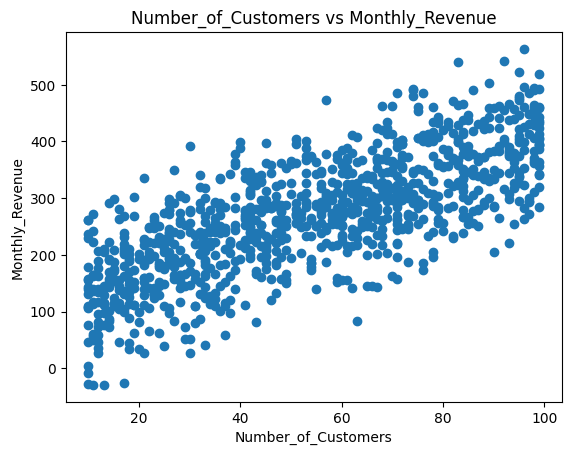

In [10]:
plt.title("Number_of_Customers vs Monthly_Revenue")
plt.xlabel("Number_of_Customers")
plt.ylabel("Monthly_Revenue")
plt.scatter(data.Number_of_Customers , y)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lt = LinearRegression()

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y ,random_state = 41 , test_size = .30)

In [13]:
lt.fit(xtrain,ytrain)

LinearRegression()

In [14]:
lt.score(xtrain , ytrain)

0.7022871804281763

In [15]:
lt.score(xtest, ytest)

0.6322001491921558

In [16]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)

In [17]:
model.fit(xtrain,ytrain)

Ridge()

In [18]:
model.score(xtrain,ytrain)

0.7021230857713896

In [19]:
model.score(xtest, ytest)

0.6333262522905585

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [21]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [22]:
rf.score(xtrain,ytrain)

0.9544375675818981

In [23]:
rf.score(xtest,ytest)

0.5802380240084397

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [25]:
dtr.score(xtrain , ytrain)

1.0

In [26]:
dtr.score(xtest , ytest)

0.18608321556895102

In [27]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(xtest, ytest)

SVR(kernel='linear')

In [28]:
svr.score(xtrain , ytrain)

0.2106761784778296

In [29]:
svr.score(xtest , ytest)

0.20475575322998063

In [30]:
model = ['LinearRegression' ,'Ridge','RandomForestRegressor','DecisionTreeRegressor','SVR']
train_score = [0.7022871804281763,0.7022871803050015,0.9524336973950563,1.0,0.695188176415068]
test_score = [0.6322001491921558,0.6321999235641533,0.5830891769294765,0.22185000914491004,0.6315546673274995]

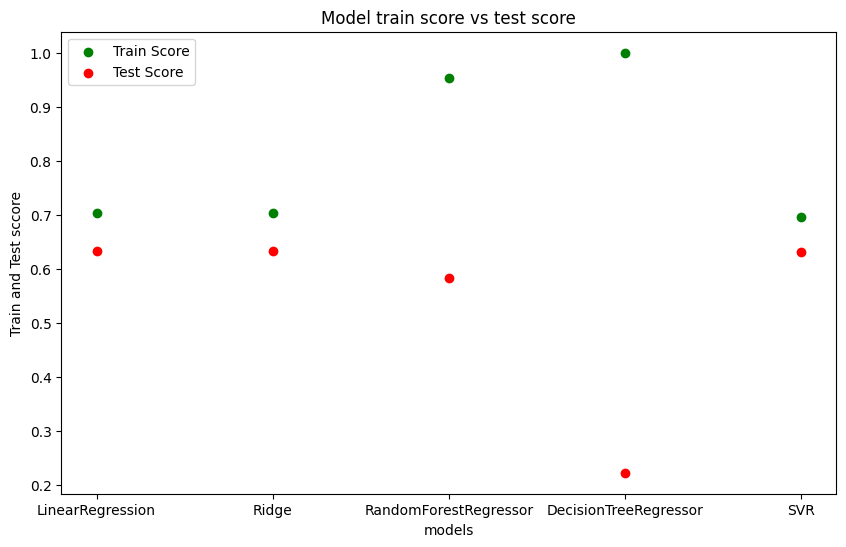

In [31]:
plt.figure(figsize=(10, 6))
plt.title('Model train score vs test score')
plt.xlabel("models")
plt.ylabel('Train and Test sccore')
plt.scatter(model , train_score , label = 'Train Score', color = 'g')
plt.scatter(model , test_score , label = 'Test Score', color = 'r')
plt.legend(loc='upper left')